In [6]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
import pandas as pd
import cobra
import json

In [7]:
model = cobra.io.load_json_model("/media/frek/Storage1/projects/personal/static/chemocobra/metabolic/models/iML1515_PKT.json")

In [8]:
mets = set(['_'.join(m.id.split('_')[:-1]) for m in model.metabolites])

In [9]:
structs_dir = "/media/frek/Storage1/projects/personal/static/chemocobra/metabolic/met_bigg_structs_mnx.csv"
df_structs = pd.read_csv(structs_dir, index_col=0)
df_structs = df_structs.reindex(list(mets)).dropna(subset=['smiles_ok'])
print(df_structs.shape)
df_structs.head()

(1052, 3)


,name,MNX,smiles_ok
universal_bigg_id,,,
ca2,Calcium,MNXM128,[Ca]
2agpe120,2-Acyl-sn-glycero-3-phosphoethanolamine (n-C12:0),MNXM34808,CCCCCCCCCCCC(=O)O[C@H](CO)COP(=O)(O)OCCN
sl26da,"N-Succinyl-LL-2,6-diaminoheptanedioate",MNXM1488,N[C@@H](CCC[C@H](N=C(O)CCC(=O)O)C(=O)O)C(=O)O
2doxg6p,2 Deoxy D glucose 6 phosphate C6H11O8P,MNXM3809,O=P(O)(O)OC[C@H]1OC(O)C[C@@H](O)[C@@H]1O
imacp,3-(Imidazol-4-yl)-2-oxopropyl phosphate,MNXM1456,O=C(COP(=O)(O)O)Cc1cnc[nH]1


In [10]:
mols = {m_id : Chem.MolFromSmiles(df_structs.loc[m_id, 'smiles_ok']) for m_id in df_structs.index}
print(len(mols))

1052


RDKit WARNING: [11:06:08] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:06:08] WARNING: not removing hydrogen atom without neighbors


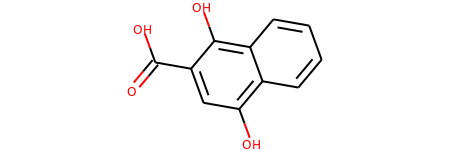

In [11]:
mols['dhna']

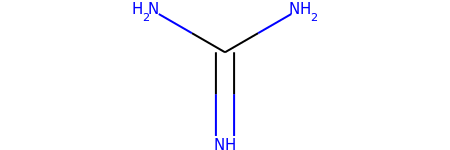

In [12]:
substr = Chem.MolFromSmiles("N=C(N)N")
substr

In [13]:
mols_substr = [m_id for m_id in mols if mols[m_id].HasSubstructMatch(substr)]

In [14]:
mols_substr

['fpram', 'argsuc', 'sucarg', 'arg__L', 'agm']

In [25]:
# Save matches
outpath = "/media/frek/Storage1/projects/personal/main/static/main/science/substr/data_substr.json"
data_substr = { m_id: {"name": df_structs.loc[m_id, "name"], "match": list(mols[m_id].GetSubstructMatch(substr))} for m_id in mols_substr}

with open(outpath, "w") as f:
    json.dump(data_substr, f)

### Save molecules

In [27]:
hmols = {m_id: Chem.AddHs(mols[m_id]) for m_id in mols_substr}
hmols['substr'] = substr

In [28]:
for m_id in hmols:
    AllChem.EmbedMolecule(hmols[m_id])
    print(AllChem.UFFOptimizeMolecule(hmols[m_id], 1000))

0
0
0
0
0
0


In [29]:
outpath = "/media/frek/Storage1/projects/personal/main/static/main/science/substr/{}.sdf"
for m_id in hmols:
    writer = Chem.SDWriter(outpath.format(m_id))
    if m_id != "substr":
        hmols[m_id].SetProp("__Name", df_structs.loc[m_id, 'name'])
    writer.write(hmols[m_id])
    writer.close()

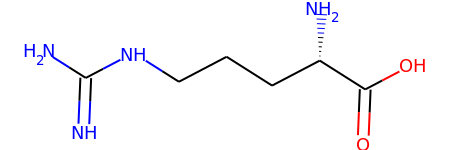

In [94]:
mols["arg__L"]

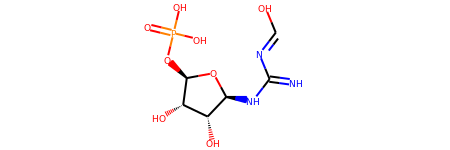

In [95]:
mols["fpram"]

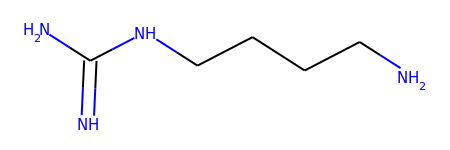

In [58]:
mols["agm"]

In [7]:
mol = Chem.MolFromSmiles("C1C2C(C(S1)CCCCC(=O)O)NC(=O)N2")

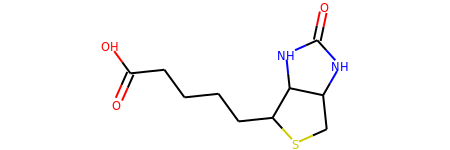

In [10]:
mol

In [11]:
AllChem.Compute2DCoords(mol)

0

In [13]:
Chem.MolToMolFile(mol, "/media/frek/Storage1/projects/personal/main/static/main/docs/biotin.mol")